In [1]:
import json
import yaml
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
config = yaml.safe_load(open("/gscratch/balazinska/enhaoz/VOCAL-UDF/configs/config.yaml", "r"))

import re
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

######## vocal-udf ########
task_0_new_udfs_mean_accuracy: nan
task_0_new_udfs_mean_f1: nan
task_0_new_udfs_mean_precision: nan
task_0_new_udfs_mean_recall: nan
task_0_new_udfs_prob_failures: nan

task_1_new_udfs_mean_accuracy: -1.0
task_1_new_udfs_mean_f1: 0.7502872089938789
task_1_new_udfs_mean_precision: -1.0
task_1_new_udfs_mean_recall: -1.0
task_1_new_udfs_prob_failures: 0.0

[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/logs/query_execution/charades/llava-single_semantic-unavailable=1-npred=3-nobj_pred=2-nvars=2-depth=1/num_missing_udfs=2/ninterp=10-nparams=10-kwargs=True-pixels=False-pretrained_models=False-ntrain_distill=100-selection=both-labels=user-budget=20/qid=0-run=0.log'
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/logs/query_execution/charades/llava-single_semantic-unavailable=1-npred=3-nobj_pred=2-nvars=2-depth=1/num_missing_udfs=2/ninterp=10-nparams=10-kwargs=True-pixels=False-pretrained_models=False-ntrain_

/gscratch/balazinska/enhaoz/jupyter/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/gscratch/balazinska/enhaoz/jupyter/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/gscratch/balazinska/enhaoz/jupyter/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/gscratch/balazinska/enhaoz/jupyter/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/gscratch/balazinska/enhaoz/jupyter/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/gscratch/balazinska/enhaoz/jupyter/lib/python3.11/site-packages/nu

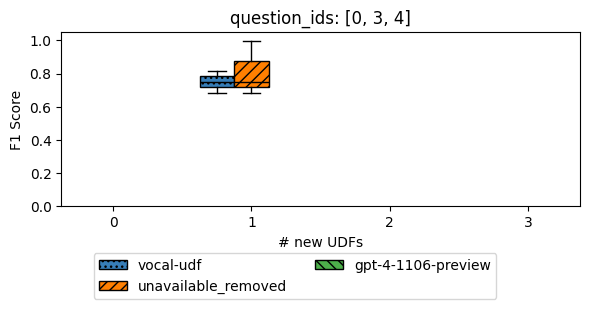

In [4]:
# Define LLM models, tasks, number of new UDFs, and hatch patterns
llm_models = ['vocal-udf', 'unavailable_removed', 'gpt-4-1106-preview']
tasks = [f"{i}_new_udfs" for i in range(4)]
easy_question_ids = [1, 2, 5, 6, 7, 8, 9]
hard_question_ids = [0, 3, 4]
question_ids = hard_question_ids
num_new_udfs = [0, 1, 2, 3]
# num_new_udfs = [0, 1]
hatch_patterns = ['...', '///', '\\\\\\', 'xxx', '***', '+++', '|||', '---', 'ooo']
handles_f1 = []

# Create a figure and axis for the boxplot
fig, ax = plt.subplots(1, 1, figsize=(6, 2.7))  # Adjust the figsize as needed

# Iterate through LLM models
for i, llm_model in enumerate(llm_models):
    print(f"######## {llm_model} ########")
    f1_data = []

    # Iterate through tasks
    for task_id in range(4):
        task = f"{task_id}_new_udfs"
        accuracy_list = []
        f1_list = []
        precision_list = []
        recall_list = []
        failed_list = []

        # Iterate through runs and questions
        if llm_model in ["unavailable_removed"]:
            if task_id != 0:
                for question_id in question_ids:
                    try:
                        with open(os.path.join(config['log_dir'], "query_execution", "charades", "single_semantic-unavailable=1-npred=3-nobj_pred=2-nvars=2-depth=1", f"num_missing_udfs={task_id}", "queries_unavailable_udfs_removed", f"qid={question_id}.log"), "r") as f:
                            last_line = f.readlines()[-1]
                        f1_score_pattern = r"F1 score: ([0-9.]+)"
                        match = re.search(f1_score_pattern, last_line)
                        f1_score = float(match.group(1))
                        f1_list.append(f1_score)
                    except Exception as e:
                        print(e)
                        continue
        elif llm_model in ['vocal-udf']:
            if task_id != 0:
                for run_id in range(1):
                    for question_id in question_ids:
                        try:
                            with open(os.path.join(config['log_dir'], "query_execution", "charades", "llava-single_semantic-unavailable=1-npred=3-nobj_pred=2-nvars=2-depth=1", f"num_missing_udfs={task_id}", "ninterp=10-nparams=10-kwargs=True-pixels=False-pretrained_models=False-ntrain_distill=100-selection=both-labels=user-budget=20", f"qid={question_id}-run={run_id}.log"), "r") as f:
                                target_line = f.readlines()[-2]
                            f1_score_pattern = r"F1 score: ([0-9.]+)"
                            match = re.search(f1_score_pattern, target_line)
                            f1_score = 0
                            if match:
                                f1_score = float(match.group(1))
                                failed_list.append(0)
                            else:
                                print(f"failed task: qid={question_id}-run={run_id}")
                                failed_list.append(1)
                            f1_list.append(f1_score)
                            accuracy_list.append(-1)
                            precision_list.append(-1)
                            recall_list.append(-1)
                        except Exception as e:
                            print(e)
                            continue
        else:
            for run_id in range(5):
                for question_id in question_ids:
                    try:
                        with open(os.path.join(config['output_dir'], "charades", llm_model, f"task_{task}_labels_run_{run_id}_question_{question_id}.json"), "r") as f:
                            data = json.load(f)
                        accuracy_list.append(data["accuracy"])
                        f1_list.append(data["f1"])
                        precision_list.append(data["precision"])
                        recall_list.append(data["recall"])
                        failed_list.append(data["failed"])
                        if '0' in task and data["failed"] > 0:
                            print(run_id, question_id)
                    except Exception as e:
                        print(e)
                        continue


        f1_data.append(f1_list)
        print(f"task_{task}_mean_accuracy: {np.mean(accuracy_list)}")
        print(f"task_{task}_mean_f1: {np.mean(f1_list)}")
        print(f"task_{task}_mean_precision: {np.mean(precision_list)}")
        print(f"task_{task}_mean_recall: {np.mean(recall_list)}")
        print(f"task_{task}_prob_failures: {np.mean(failed_list)}")
        print()

    # Create a grouped boxplot for F1 scores
    bp_f1 = ax.boxplot(f1_data,
                       positions=np.array(range(len(f1_data))) * (len(llm_models) + 1) + i,
                       sym='.',
                       widths=1,
                       showfliers=False,
                       patch_artist=True,
                       boxprops=dict(facecolor=CB_color_cycle[i], hatch=hatch_patterns[i]),
                       medianprops=dict(color='black'))
    handles_f1.append(bp_f1["boxes"][0])

# Customize the plot labels and legend
ax.set_title(f"question_ids: {question_ids}")
ax.set(ylabel="F1 Score")
ax.set(xlabel="# new UDFs")
ax.set_ylim(bottom=0, top=1.05)
ax.set_xticks(np.arange(len(llm_models) / 2 - 0.5, len(num_new_udfs) * len(llm_models) + len(llm_models) / 2 + 0.5, len(llm_models) + 1))
ax.set_xticklabels(num_new_udfs)
fig.legend(handles_f1, llm_models, prop={"size": 10}, loc='upper center', bbox_to_anchor=(0.5, 0.07),
           fancybox=True, shadow=False, ncol=2)
plt.subplots_adjust(bottom=0.15)
fig.tight_layout()
plt.show()